# Pytorch Demo 
## Lets construct the basic model with perceptron


In [2]:
!pip3 install torch

In [138]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable

In [45]:
import pandas as pd
my_data=pd.read_csv("https://github.com/rajanpbg/machinelearning/raw/deep-learning/data/energydata_complete.csv")

In [46]:
my_data=my_data.drop(columns=["date"])
my_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


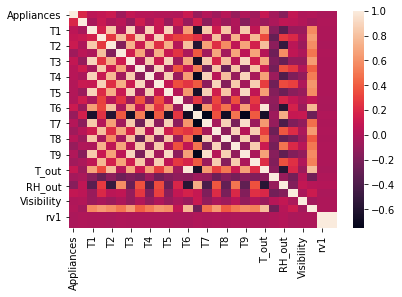

In [47]:
corr=my_data.corr()
import seaborn as sns
sns.heatmap(corr)

In [48]:
X=my_data.iloc[:,1:]
Y=my_data.iloc[:,0]
X = (X - X.min())/(X.max() - X.min())
X.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
print(x_train.shape,y_train.shape)
x_train.head()

(14801, 27) (14801,)


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
8242,0.0,0.444562,0.306577,0.174461,0.558534,0.251745,0.431531,0.434835,0.293072,0.324892,0.225316,0.322078,0.777856,0.276469,0.316548,0.419591,0.306717,0.271592,0.304912,0.309753,0.598450,0.675439,0.333333,0.600000,0.325792,0.129026,0.129026
10603,0.0,0.444562,0.369507,0.166465,0.664355,0.398804,0.445085,0.428529,0.478162,0.381589,0.296436,0.371271,0.736097,0.456173,0.548109,0.501984,0.477268,0.479709,0.579332,0.367095,0.561240,0.960526,0.428571,0.766667,0.566365,0.135863,0.135863
18910,0.0,0.834213,0.617907,0.598236,0.750652,0.800432,0.704471,0.801558,0.821227,0.725946,0.342246,0.828397,0.210061,0.800800,0.733261,0.742386,0.740918,0.862227,0.796082,0.722401,0.517054,0.767544,0.142857,0.600000,0.951735,0.170407,0.170407
16772,0.0,0.739176,0.294652,0.402229,0.523104,0.606514,0.437451,0.765766,0.384265,0.551362,0.275336,0.485831,0.226896,0.697455,0.386170,0.676839,0.466073,0.718002,0.584575,0.547696,0.528682,0.535088,0.071429,0.600000,0.546003,0.503939,0.503939
16805,0.0,0.739176,0.338593,0.877974,0.306852,0.656364,0.398349,0.765766,0.419974,0.703615,0.785109,0.867268,0.000000,0.697455,0.414805,0.667684,0.437400,0.760666,0.562638,0.769561,0.538760,0.370614,0.214286,0.600000,0.699095,0.460764,0.460764


In [158]:
y_train.head()

8242      40
10603     40
18910     60
16772     40
16805    100
Name: Appliances, dtype: int64

In [169]:
class LR(nn.Module):
    def __init__(self,inputsize,outputsize):
        super().__init__()
        self.linear1 = nn.Linear(inputsize,100)
        self.linear2 = nn.Linear(100,70)
        self.linear3 = nn.Linear(70,50)
        self.linear4 = nn.Linear(50,30)
        self.linear5 = nn.Linear(30,15)
        self.linear6 = nn.Linear(15,outputsize)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        x = torch.relu(self.linear4(x))
        x = torch.relu(self.linear5(x))
        x =  self.linear6(x)
        return  x

In [170]:
torch.manual_seed(2)
model = LR(27, 1)
#print(list(model.parameters()))
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
losses = []

In [171]:
from statistics import mean 
x_train_tensor = torch.tensor(x_train.values).float()
y_train_tensor = torch.tensor(y_train.values).float()
x_test_tensor = torch.tensor(x_test.values).float()
y_test_tensor = torch.tensor(y_test.values).float()
epochs = 5000
for i in range(epochs):
    y_pred = model.forward(Variable(x_train_tensor)).squeeze()
    loss = loss_function(y_pred,Variable(y_train_tensor))
    #print('epoch:',i)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100 == 0:
        print('epoch:',  i, loss)

epoch: 0 tensor(20292.9805, grad_fn=<MseLossBackward>)
epoch: 100 tensor(9886.7656, grad_fn=<MseLossBackward>)
epoch: 200 tensor(8941.0234, grad_fn=<MseLossBackward>)
epoch: 300 tensor(8404.7568, grad_fn=<MseLossBackward>)
epoch: 400 tensor(7916.9009, grad_fn=<MseLossBackward>)
epoch: 500 tensor(7573.1191, grad_fn=<MseLossBackward>)
epoch: 600 tensor(7948.4438, grad_fn=<MseLossBackward>)
epoch: 700 tensor(6953.2217, grad_fn=<MseLossBackward>)
epoch: 800 tensor(8069.9878, grad_fn=<MseLossBackward>)
epoch: 900 tensor(7248.7495, grad_fn=<MseLossBackward>)
epoch: 1000 tensor(6314.7153, grad_fn=<MseLossBackward>)
epoch: 1100 tensor(7963.2129, grad_fn=<MseLossBackward>)
epoch: 1200 tensor(6244.7695, grad_fn=<MseLossBackward>)
epoch: 1300 tensor(5918.5312, grad_fn=<MseLossBackward>)
epoch: 1400 tensor(8487.5020, grad_fn=<MseLossBackward>)
epoch: 1500 tensor(7602.7402, grad_fn=<MseLossBackward>)
epoch: 1600 tensor(7114.8154, grad_fn=<MseLossBackward>)
epoch: 1700 tensor(6824.4814, grad_fn=<Mse

Text(0.5, 0, 'epoch')

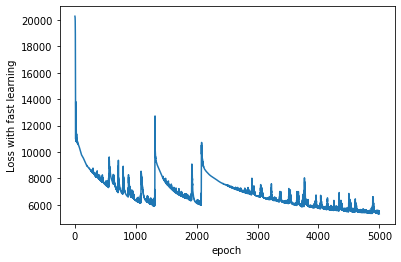

In [172]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss with fast learning')
plt.xlabel('epoch')


In [173]:
with torch.no_grad():
  pred=model(Variable(x_test_tensor[5]))
  print("Ground truth:", y_test_tensor[5], "Prediction:", pred.item())
  pred=model(Variable(x_test_tensor[10]))
  print("Ground truth:", y_test_tensor[10], "Prediction:", pred.item())

with torch.no_grad():
  predicted = model(Variable(x_train_tensor))

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_train,predicted))
print("Root Mean Squared Error Training Data : {}".format(rmse))

with torch.no_grad():
  predicted = model(Variable(x_test_tensor))

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,predicted))
print("Root Mean Squared Error Test Data : {}".format(rmse))


Ground truth: tensor(120.) Prediction: 145.18458557128906
Ground truth: tensor(110.) Prediction: 191.8661651611328
Root Mean Squared Error Training Data : 72.85702228287839
Root Mean Squared Error Test Data : 87.63972360572568


In [174]:
torch.manual_seed(2)
model = LR(27, 1)
#print(list(model.parameters()))
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
losses = []

In [175]:
from statistics import mean 
x_train_tensor = torch.tensor(x_train.values).float()
y_train_tensor = torch.tensor(y_train.values).float()
x_test_tensor = torch.tensor(x_test.values).float()
y_test_tensor = torch.tensor(y_test.values).float()
epochs = 10000
for i in range(epochs):
    y_pred = model.forward(Variable(x_train_tensor)).squeeze()
    loss = loss_function(y_pred,Variable(y_train_tensor))
    #print('epoch:',i)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100 == 0:
        print('epoch:',  i, loss)

epoch: 0 tensor(20292.9805, grad_fn=<MseLossBackward>)
epoch: 100 tensor(10806.6709, grad_fn=<MseLossBackward>)
epoch: 200 tensor(10572.0479, grad_fn=<MseLossBackward>)
epoch: 300 tensor(10205.5420, grad_fn=<MseLossBackward>)
epoch: 400 tensor(9684.4385, grad_fn=<MseLossBackward>)
epoch: 500 tensor(9349.1670, grad_fn=<MseLossBackward>)
epoch: 600 tensor(9057.0547, grad_fn=<MseLossBackward>)
epoch: 700 tensor(8732.3906, grad_fn=<MseLossBackward>)
epoch: 800 tensor(8438.4297, grad_fn=<MseLossBackward>)
epoch: 900 tensor(8182.0483, grad_fn=<MseLossBackward>)
epoch: 1000 tensor(7963.0020, grad_fn=<MseLossBackward>)
epoch: 1100 tensor(7761.2905, grad_fn=<MseLossBackward>)
epoch: 1200 tensor(7572.7441, grad_fn=<MseLossBackward>)
epoch: 1300 tensor(7352.5083, grad_fn=<MseLossBackward>)
epoch: 1400 tensor(7084.4526, grad_fn=<MseLossBackward>)
epoch: 1500 tensor(6832.0166, grad_fn=<MseLossBackward>)
epoch: 1600 tensor(6560.5425, grad_fn=<MseLossBackward>)
epoch: 1700 tensor(6344.0791, grad_fn=<

Text(0.5, 0, 'epoch')

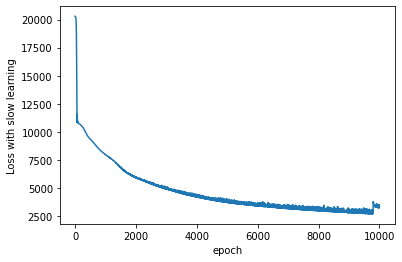

In [176]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss with slow learning')
plt.xlabel('epoch')

In [177]:
with torch.no_grad():
  pred=model(Variable(x_test_tensor[5]))
  print("Ground truth:", y_test_tensor[5], "Prediction:", pred.item())
  pred=model(Variable(x_test_tensor[10]))
  print("Ground truth:", y_test_tensor[10], "Prediction:", pred.item())

with torch.no_grad():
  predicted = model(Variable(x_train_tensor))

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_train,predicted))
print("Root Mean Squared Error Training Data : {}".format(rmse))

with torch.no_grad():
  predicted = model(Variable(x_test_tensor))

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,predicted))
print("Root Mean Squared Error Test Data : {}".format(rmse))

Ground truth: tensor(120.) Prediction: 111.24932861328125
Ground truth: tensor(110.) Prediction: 88.75572204589844
Root Mean Squared Error Training Data : 58.45990348279754
Root Mean Squared Error Test Data : 86.92089310010027


Root Mean Squared Error: 82.45624806190662
